In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'text.latex.preamble': r'\usepackage{mathrsfs}',
    'pdf.fonttype': 42
    })


In [2]:
regions = ["southeast", "central", "west"]
base_path = "/workspace/Annau2023/data/metric_evolution"
train = {region: pd.read_csv(f"{base_path}/{region}_train_metrics.csv") for region in regions}
test = {region: pd.read_csv(f"{base_path}/{region}_test_metrics.csv") for region in regions}

In [3]:
markermap = {
    "CNN": '-',
    "L_5": '--',
    "L_9": '-.',
    "L_13": ':',
    "NFS": '-',
    "WRF": '--'
}

colormap = {
    "CNN": '#377eb8',
    "L_5": '#ff7f00',
    "L_9": '#4daf4a',
    "L_13": '#f781bf',
    "NFS": '#a65628',
    "WRF": '#984ea3'
}

titlemap = {
    "CNN": "CNN",
    "L_5": r"$\mathscr{L}_5$",
    "L_9": r"$\mathscr{L}_9$",
    "L_13": r"$\mathscr{L}_{13}$",
    "NFS": "NFS",
    "WRF": "WRF"
}



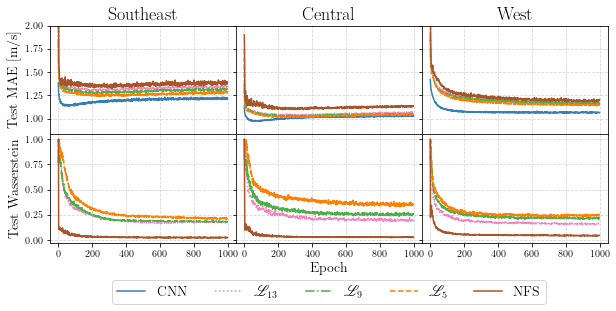

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(10, 4.), sharex='col', sharey='row')

for region in test:
    x = test[region]["Epoch"]
    for c in test[region].columns[1:]:
        if "L_" in c:
            colsplit = c.split("_")
            sr_model = f"L_{colsplit[1]}"
            metric_name = colsplit[-1]
        else:
            sr_model, metric_name = c.split("_")
        y = test[region][c]

        if metric_name == "mae":
            ax[0, regions.index(region)].plot(
                x,
                y,
                label=titlemap[sr_model],
                color=colormap[sr_model],
                linestyle=markermap[sr_model]
            )
            ax[0, regions.index(region)].set_ylim(0.83, 2)

        # Don't plot the Wasserstein distance for the CNN
        if sr_model != "CNN":
            y = test[region][c]
            if metric_name == "wasserstein":
                ax[1, regions.index(region)].plot(
                    x,
                    y/y.max(),
                    label=titlemap[sr_model],
                    color=colormap[sr_model],
                    linestyle=markermap[sr_model]
                )
        ax[0, regions.index(region)].set_title(region.capitalize(), fontsize=18)

ax[0, 0].set_ylabel("Test MAE [m/s]", fontsize=14)
ax[1, 0].set_ylabel("Test Wasserstein", fontsize=14)
ax[1, 1].set_xlabel("Epoch", fontsize=14)
ax[0, 1].legend(ncol=5, frameon=True, loc='center', fontsize=14, bbox_to_anchor=(0.5, -1.45))
[a.grid(linestyle="--", alpha=0.5) for a in ax.flatten()]
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(
    "/workspace/paper/pdfs/fig6.pdf",
    bbox_inches='tight',
    format='pdf',
    dpi=350
)

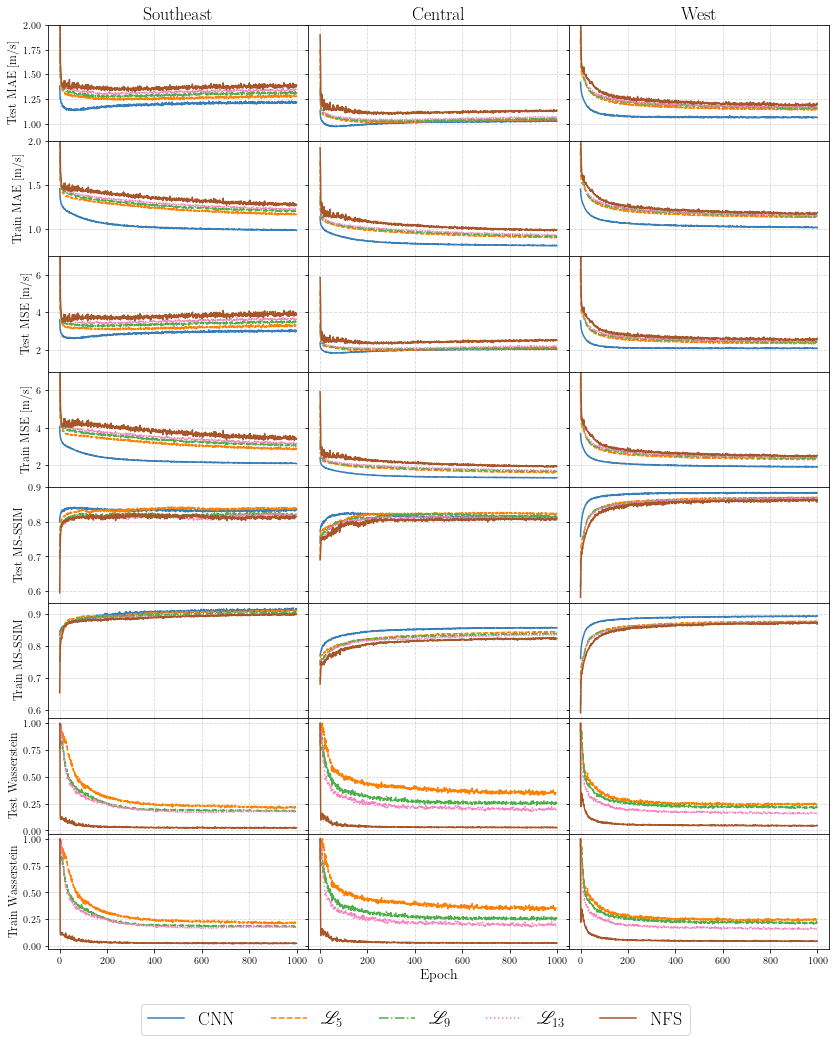

In [5]:
fig, ax = plt.subplots(8, 3, figsize=(14, 17), sharex='col', sharey='row')

# define plot layout
layout = [
    ["mae", test, (0.83, 2), "Test MAE [m/s]"],
    ["mae", train, (0.7, 2), "Train MAE [m/s]"],
    ["mse", test, (0.83, 7), "Test MSE [m/s]"],
    ["mse", train, (0.83, 7), "Train MSE [m/s]"],
    ["msssim", test, None, "Test MS-SSIM"],
    ["msssim", train, None, "Train MS-SSIM"],
    ["wasserstein", test, None, "Test Wasserstein"],
    ["wasserstein", train, None, "Train Wasserstein"]
]
 
sr_models = ["CNN", "L_5", "L_9", "L_13", "NFS"]
for region in test:
    x = test[region]["Epoch"]
    for irow, row in enumerate(layout):
        metric_name, df, ylims, ylabel = row

        for sr_model in sr_models:
            if metric_name != "wasserstein":
                col_name = f"{sr_model}_{metric_name}"
                y = df[region][col_name]

                ax[irow, regions.index(region)].plot(
                    x,
                    y,
                    label=titlemap[sr_model],
                    color=colormap[sr_model],
                    linestyle=markermap[sr_model]
                )

            if metric_name == "wasserstein" and sr_model != "CNN":
                col_name = f"{sr_model}_wasserstein"
                y = test[region][col_name]
                ax[irow, regions.index(region)].plot(
                    x,
                    y/y.max(),
                    label=titlemap[sr_model],
                    color=colormap[sr_model],
                    linestyle=markermap[sr_model]
                )
        ax[irow, regions.index(region)].grid(linestyle="--", alpha=0.5)

        if ylims is not None:
            ax[irow, regions.index(region)].set_ylim(*ylims)
        ax[irow, 0].set_ylabel(ylabel, fontsize=12)
    ax[0, regions.index(region)].set_title(region.capitalize(), fontsize=18)



ax[-1, 1].set_xlabel("Epoch", fontsize=14)
ax[-3, 1].legend(loc='best', ncol=5, frameon=True, fontsize=18, bbox_to_anchor=(1.5, -2.4))
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(
    "/workspace/paper/pdfs/figS7.pdf",
    bbox_inches='tight',
    format='pdf',
    dpi=350
)